We will discuss the step by step approach to create a Machine Learning predictive model for the apt salary band, based on a "Census Income" 32521 professionals from around the world in 2020.  
This flow is iseful to solve any supervised ML classification problem, following Thinking Neuron web site:  

1. Reading the data in python  
2. Defining the problem statement  
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejection useless columns
7. Histogram and Barcharts for visual exploratory data analysis for data distribution
8. **Feature Selection** based on data distribution
9. Outlier treatment 
10. Missing Values treatment
11. Visual  correlation analysis
12. Statistical correlation analysis (**Feature selection**, sampling) 
13. Converting data to numeric for ML
14. K-fold cross validation
15. Trying multiple classification algorithms 
16. Selecting the best Model
17. Deploying the best model in production



# Reading the data  

This csv file constains the historical census data of 32561 working professionals from all over the world indicating whether they earn more than $50k or not.  

**The goal** is to predict if a new candidate can be hired with a salary more than $50K or not?  

The description of the data is as follow:

>- **age**: Age of the emplyee.   
>- **workclass**: Which type of organization the emplyee works_in? State-gov/Private and so on.  
> **fnlwgt**: Final weight, which is the number of units in the target population that the responding unit represents.  
>- **education**: The highest education of the employee.  
>- **education_num**: Numeric code of the previous variable.  
>- **marital_status**: Marital status of the employee.  
>- **occupation**: Type of job.  
>- **relationship**: Condition in a relationship, husband, wife, and so on.  
>- **race**: Which race the employee belongs to.  
>- **sex**: Gender.  
>- **capital_gain**: In a year.  
>- **capital.loss**: In a year.  
>- **hours_per_week**: Hours of work in a week.  
>- **native_country**: Which country the employee is working?.  
>- **SalaryGT50K**: Is the salary greater than $50000k or not.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
link = ("https://thinkingneuron.com/wp-content/uploads/2020/09/SalaryData.csv")
SalaryData = pd.read_csv(link)
SalaryData.shape

(32561, 15)

In [3]:
SalaryData.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital.loss', 'hours_per_week', 'native_country',
       'SalaryGT50K'],
      dtype='object')

In [4]:
#Removing duplacate rows if any.
SalaryData = SalaryData.drop_duplicates()
print('Data after deleting duplicates values', SalaryData.drop_duplicates().shape)
SalaryData.head()

Data after deleting duplicates values (32537, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Defining the problem statement
Create a predictive model which can tell if a person deserves a salary grater than 50,000 dollars or not?

# Identifying the Target variable
* Target variable = SalaryGT50K.
* Predictors =  age, workclass, education, marital_status, occupation, etc.
* SalaryGT50K = 0, The employe earns less than 50k in a year.
* SalaryGT50K = 1, The employe earns more than 50k in a year.  

Based on the problem statement we need to create a **supervised ML classification model**, as the target variable is categorical.  

Keep in mind that for other cases of the Target Variable would be:  
- Continuous, i.e. actual salary amount, the task would be a regression problem and the goal would be to predict a numerical values.
- Time seriesforecasting for temporal data, i.e. predicting salary over time,
- Unsupervised Model for continuos target variable: If the problem did not involve predicting a target vairable, instead to dicover inherent patterns or grouping in the data. 



# Looking at the distribution of Target variable
* If the variable's distribution is too skeweed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all classes.  

As the **Target variable is categorical** so we use **bar chart**.

<Axes: xlabel='SalaryGT50K'>

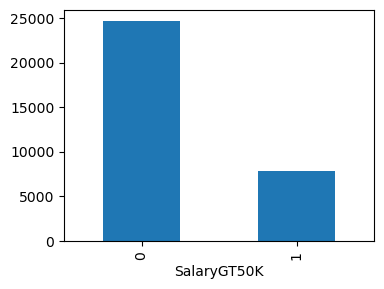

In [5]:
#%matplotlib inline
GroupedData = SalaryData.groupby('SalaryGT50K').size()
GroupedData.plot.bar(figsize=(4,3))

The question of the "SalaryGT50K" column is if it is more or less than 50K, only 2 types of responses, 0 or 1. 
The data distribution of the target variable is satisfatory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

* To guage the overall data
* The volume of data
* Type sof columns present in the data
* Initial assessment of the data is useful to identify which columns are Quantitative, Categorical or Qualitative.

There are four commands which are used for basic data exploration in python
* head(): This helps to see a few sample rows of the data
* info(): This provides the summarized information of the data
* describe(): This provides the descriptive statistical detail of the data.
* nunique(): This help us to identify if a column is categorical or continuos

We must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the salary earned by the employee? If the answer is clear 'No', then let's remove the column immediately form the data.  

In [6]:
# Observing the summarized information of data SalaryData.info()
# Data types, Missing values based on number of non-null values Vs total rows etc. Also can be see with SalaryData.isnull().sum() 
# Remove those variables from data which have too many missing values (Missing Values > 30%): We do not have missing values in this case.
# Remove Qualitative variables which cannot be used in Machine Learning
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  SalaryGT50K     32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [7]:
SalaryData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital.loss      0
hours_per_week    0
native_country    0
SalaryGT50K       0
dtype: int64

In [8]:
# Looking at the descriptive statistics of the data
SalaryData.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,27795,21815,NaN,NaN,NaN,29153,NaN
mean,38.585887,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,0.240926
std,13.625962,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,0.427652
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


We need to understand which columns are categorical and which ones are continuous. 
> Categorical: Typically if the number of unique values are $< 20$ in a column.  
> Continous: Number of unique values $> 20$ in a column.


In [9]:
SalaryData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital.loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

## Basic data exploration results
Based on the basic exloration above, let's create an initial report of the data. This is an initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.

* age: Continuous. Selected.
* 1. workclass: Categorical. Selected.
* fnlwgt: Continuous. Selected.
* 2. education: Categorical. Selected.
* education_num: Categorical. Selected.
* 3. marital_status: Categorical. Selected.
* 4. occupation: Categorical. Selected.
* 5. relationship: Categorical. Selected.
* 6. race: Categorical. Selected.
* 7. sex: Categorical. Selected.
* capital_gain: Continuous. Selected.
* capital.loss: Continuous. Selected.
* hours_per_week: Continuous. Selected.
* 8. native_country: Categorical. Selected.
* SalaryGT50K: Categorical. Selected. **This is the Target Variable!**

# Rejection useless columns

# Visual exploratory Data Analysis
* Categorical variables: Bar plot
*  Continuous variables: Histogram

## Visualizing the *categorical* predictor variables
We can spot, typically a **categorical variable** contains less than 20 Unique values **AND** there is repetition of values, which means the data **can be grouped by those unique values**.

Based on the Basic Data Exploration above, we have spotted eight categorical predictors in the data

Categorical Predictors: 'relationship', 'race', 'sex', 'native_country', workclass', 'education', 'marital_status',and 'occupation'

Let's use bar charts to see how the data is distributed for these categorical columns.

> We will plot bar charts at once, since there is no default function which can plot bar charts for multiple columns at once let's define our function for the same. 

In [10]:
def PlotBarCharts(inpData, colsToPlot):
    #%matplotlib inline

    #generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,10))
    fig.suptitle('Bar charts of: '+str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot.bar(ax=subPlot[plotNumber])

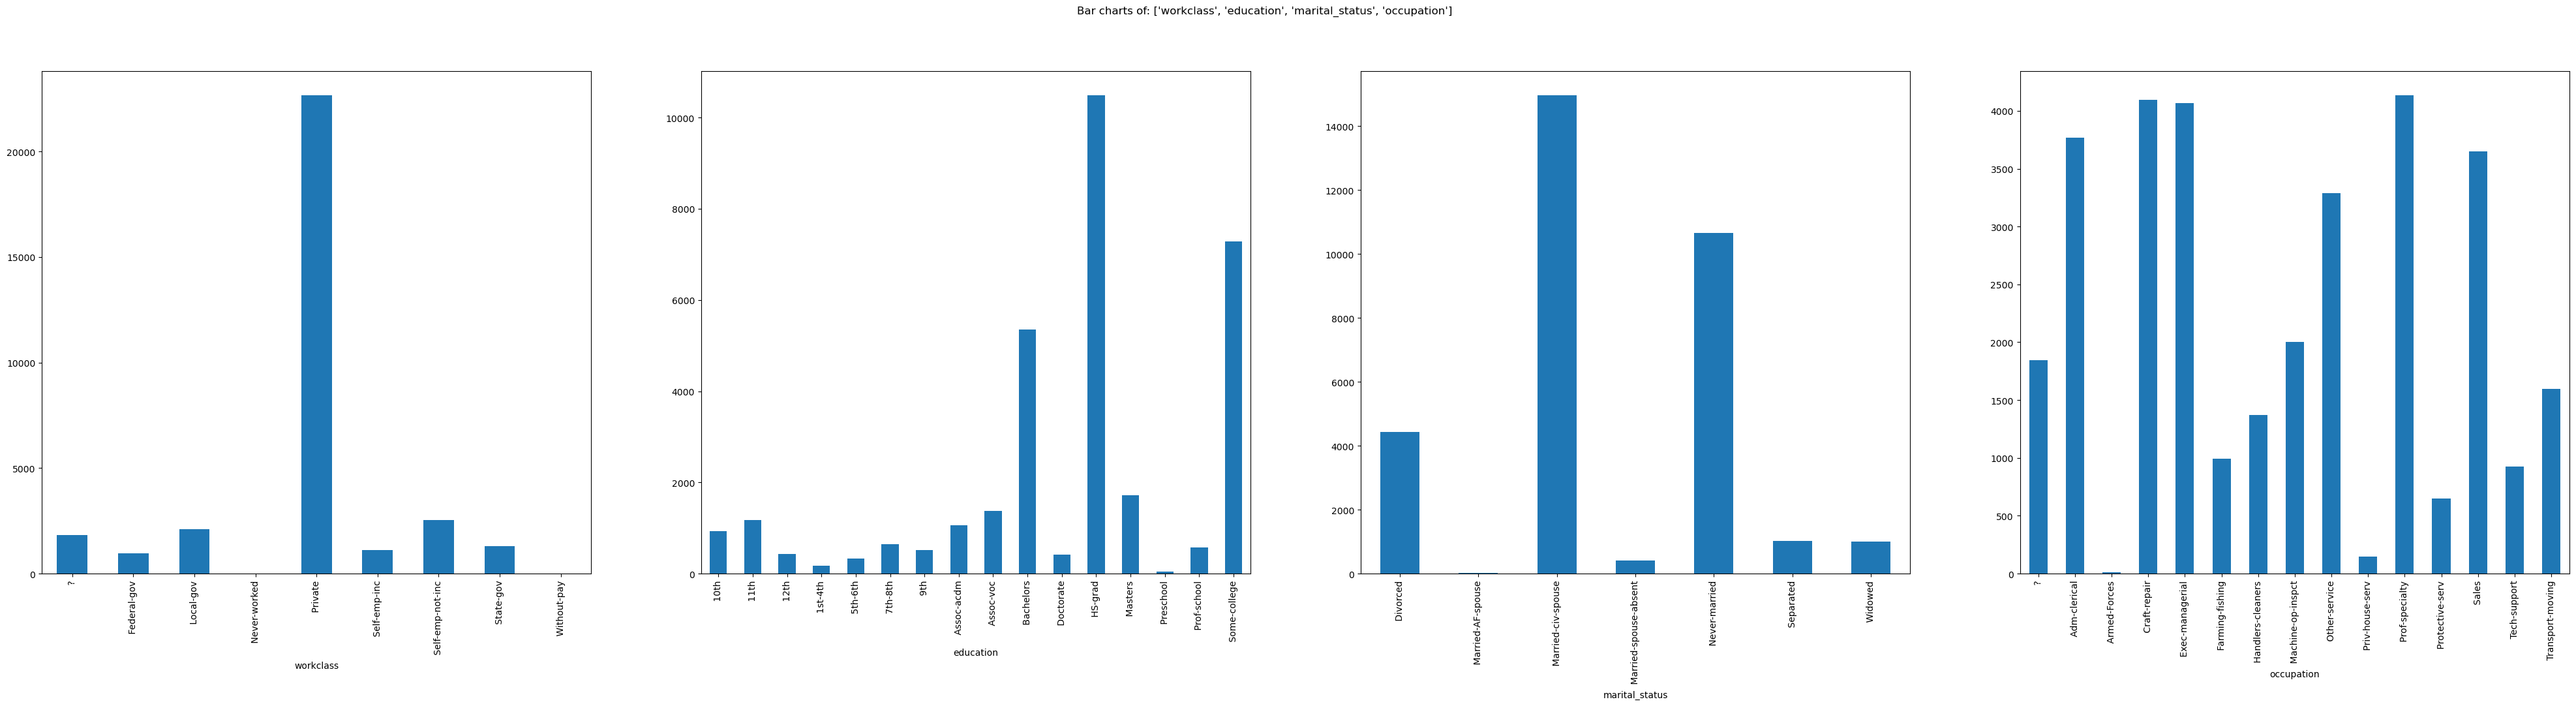

In [11]:
## calling the function
PlotBarCharts(inpData=SalaryData, colsToPlot=['workclass', 'education', 'marital_status', 'occupation'])

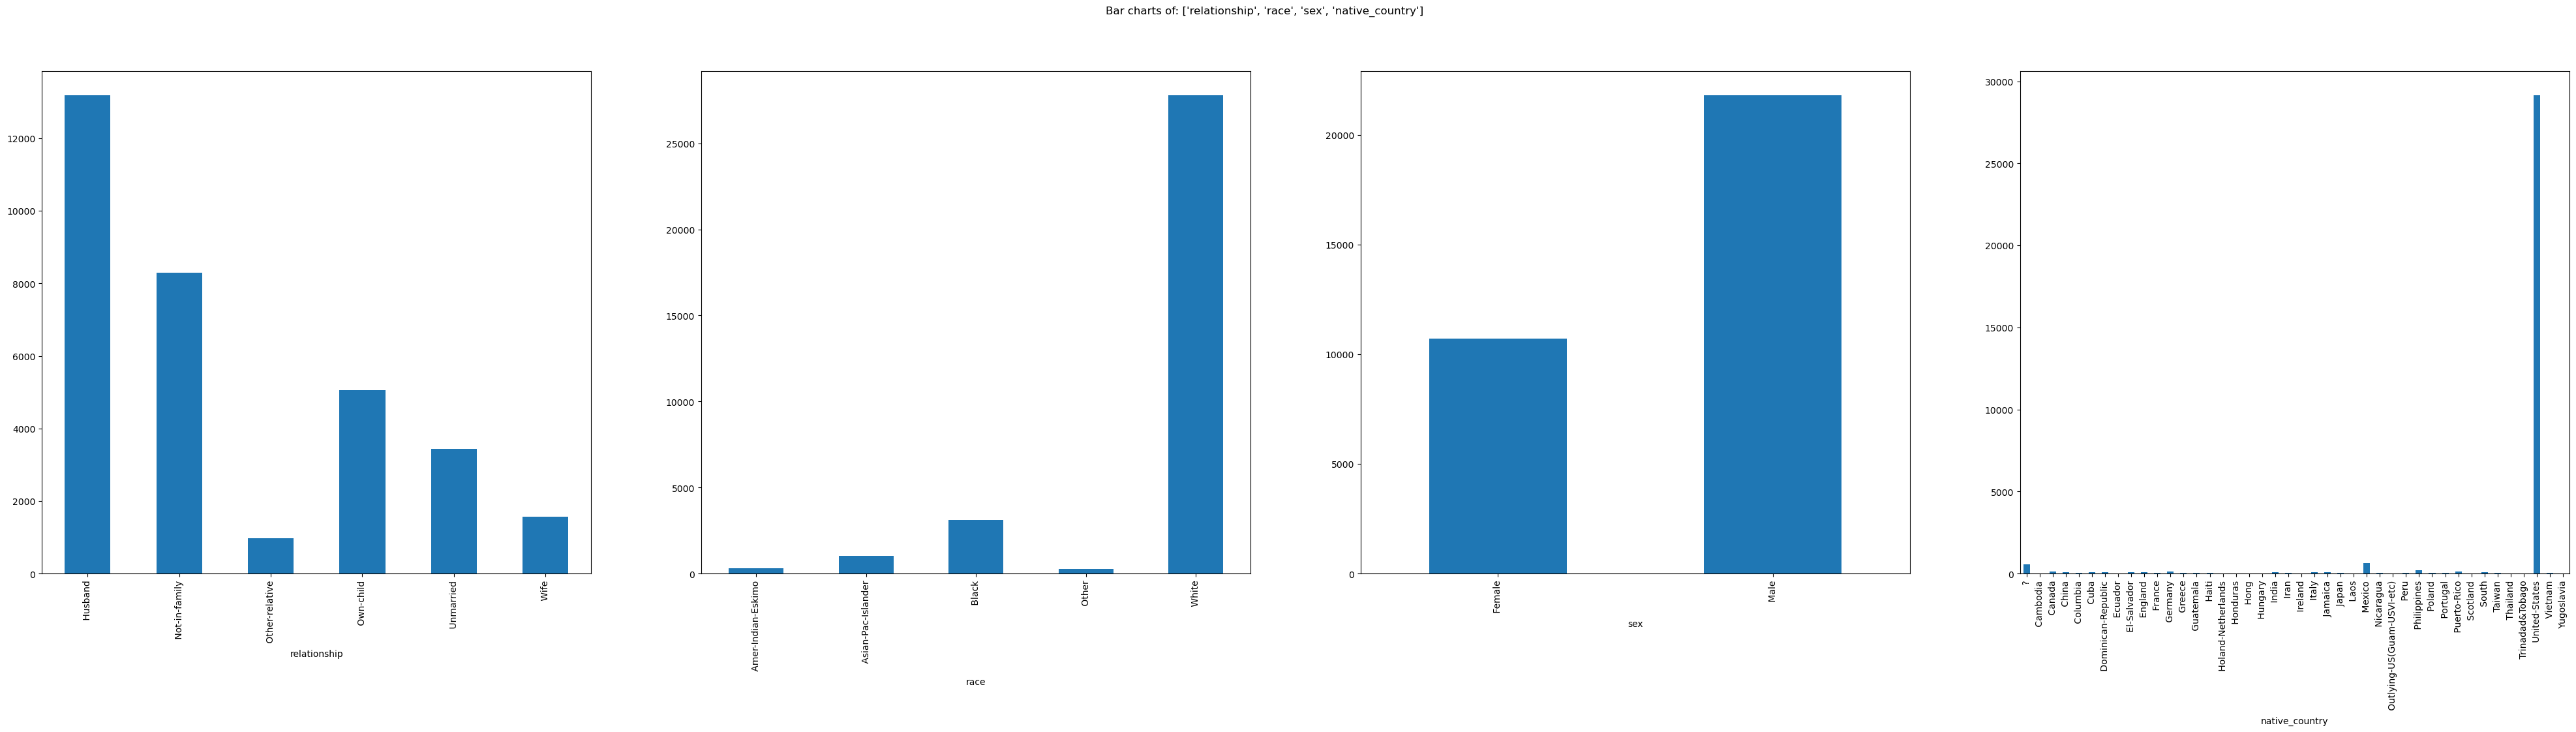

In [12]:
# calling the function for the rest of the variables
PlotBarCharts(inpData=SalaryData, colsToPlot=['relationship', 'race', 'sex', 'native_country'])

> ### Bar Charts Interpretation
Each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "occupation" column, because each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is only one dominat bar like in the "native_country" chart, that mean there is only one dominant bar and the other categories are present in very low numbers. These kind of distrubitions may not be very helpful in machine learning.  
We will confirm this in the correlation analysis section and take a final call to select or reject the column.

For now all the categorical variables are selected except "native_country".

**Selected categorical variables:** 'workclass', 'education', 'marital_status','occupation', 'relationship', 'race', 'sex'


## Visualizing the continuous predictor variables

Based on the Basic Data Exploration, there are five continuous predictor variables 'age', 'fnlwgt', 'capital_gain', 'capital.loss', 'hours_per_week'.

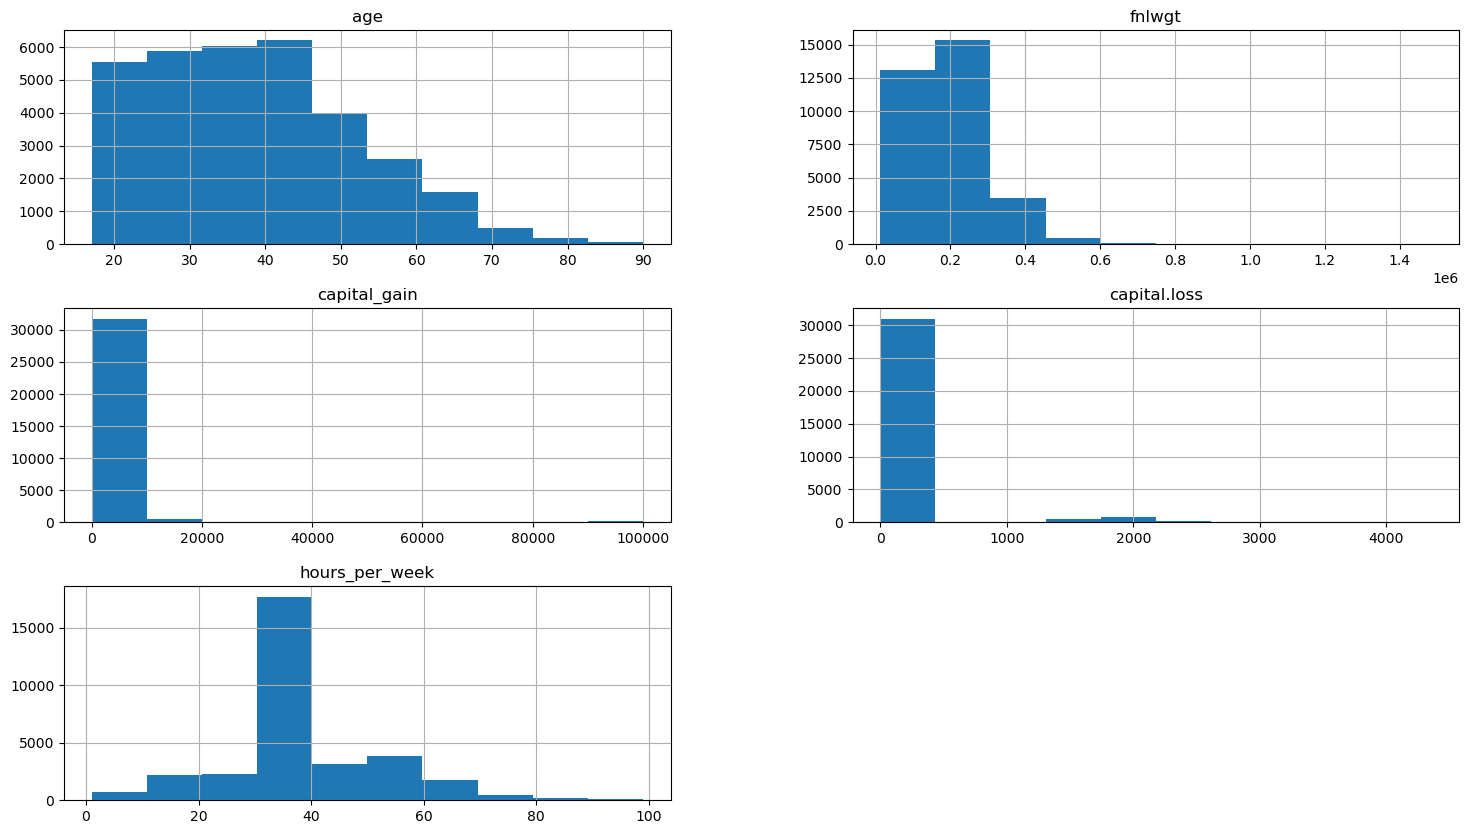

In [13]:
SalaryData.hist(['age', 'fnlwgt', 'capital_gain', 'capital.loss', 'hours_per_week'], figsize=(18,10))
plt.show()
plt.show()

> ### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 6200 rows in data that has an age between 40 to 45.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve.  
If there is too much skewness, then **outlier treatment** should be done and the column should be re-examined, **if that also does not solve the problem then only reject the column**.

For now let's select:

* age
* fnlwgt: Selected. Outliers seen beyond 600000, need to treat them.
* capital_gain: Selected. Outliers seen beyond 40000, need to treat them.
* capital.loss: Selected. Outliers seen beyond 1000, need to treat them.
* hours_per_week: Selected. Distribution looks good.

# Feature Selection based on data distribution

Selected categorical variables: 'workclass', 'education', 'marital_status','occupation', 'relationship', 'race', 'sex'  

------------------------------------------------------------------------

Selected continuous variables:
For now let's select:

* age
* fnlwgt: Selected. Outliers seen beyond 600000, need to treat them.
* capital_gain: Selected. Outliers seen beyond 40000, need to treat them.
* capital.loss: Selected. Outliers seen beyond 1000, need to treat them.
* hours_per_week: Selected. Distribution looks good.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails (colas) in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why we should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

W have below two options to treat outliers in the data.

 * Option-1: Delete the outlier Records. Only if there are just few rows lost.
 * Option-2: Impute the outlier values with a logical business value.

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

> **1) Replacing outliers for 'fnlwgt' variable**  
First to find nearest values to 600000 mark.

In [14]:
SalaryData['fnlwgt'][SalaryData['fnlwgt']>599000].sort_values()

23600     599629
22570     602513
28641     604045
29347     604380
6852      604506
          ...   
8258     1226583
15569    1268339
16739    1366120
18138    1455435
14449    1484705
Name: fnlwgt, Length: 143, dtype: int64

> Second: Based on the above result, that shows the rearest logical value is 599629, hence, replacing any value above 600000 with it.

In [15]:
# Replacing outliers with nearest possible value
SalaryData['fnlwgt'][SalaryData['fnlwgt']>600000] = 599629

In [16]:
SalaryData['fnlwgt'][SalaryData['fnlwgt']>599000].sort_values()

182      599629
20961    599629
21386    599629
21521    599629
21790    599629
          ...  
12078    599629
12263    599629
12381    599629
9748     599629
32205    599629
Name: fnlwgt, Length: 143, dtype: int64

> **2) Replacing outliers for 'Capital_gain' variable**  
First to find the nearest values to 40000 mark.

In [17]:
SalaryData['capital_gain'][SalaryData['capital_gain']>40000].sort_values()

6433     41310
20176    41310
20987    99999
21188    99999
21489    99999
         ...  
12062    99999
12093    99999
12141    99999
32238    99999
32518    99999
Name: capital_gain, Length: 161, dtype: int64

> Second: Based on the above result, that shows the rearest logical value is 41310, hence, replacing any value above 40000 with it.

In [18]:
SalaryData['capital_gain'][SalaryData['capital_gain']>40000] = 41310

In [19]:
SalaryData['capital_gain'][SalaryData['capital_gain']>40000].sort_values()

1246     41310
20613    41310
20987    41310
21188    41310
21489    41310
         ...  
11976    41310
12062    41310
12093    41310
16422    41310
32518    41310
Name: capital_gain, Length: 161, dtype: int64

> **3) Replacing outliers for 'capital.loss' variable**  
First to find nearest values to 1000 mark.

In [20]:
SalaryData['capital.loss'][SalaryData['capital.loss']<1000].sort_values(ascending=False)

11043    974
7032     974
32500    880
11442    880
4424     880
        ... 
10850      0
10849      0
10848      0
10847      0
32560      0
Name: capital.loss, Length: 31054, dtype: int64

> Second: Based on the above result, that shows the rearest logical value is 974, hence, replacing any all outliers beyond 1000 with 974.

In [21]:
SalaryData['capital.loss'][SalaryData['capital.loss']>1000] = 974

Visualizing values after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

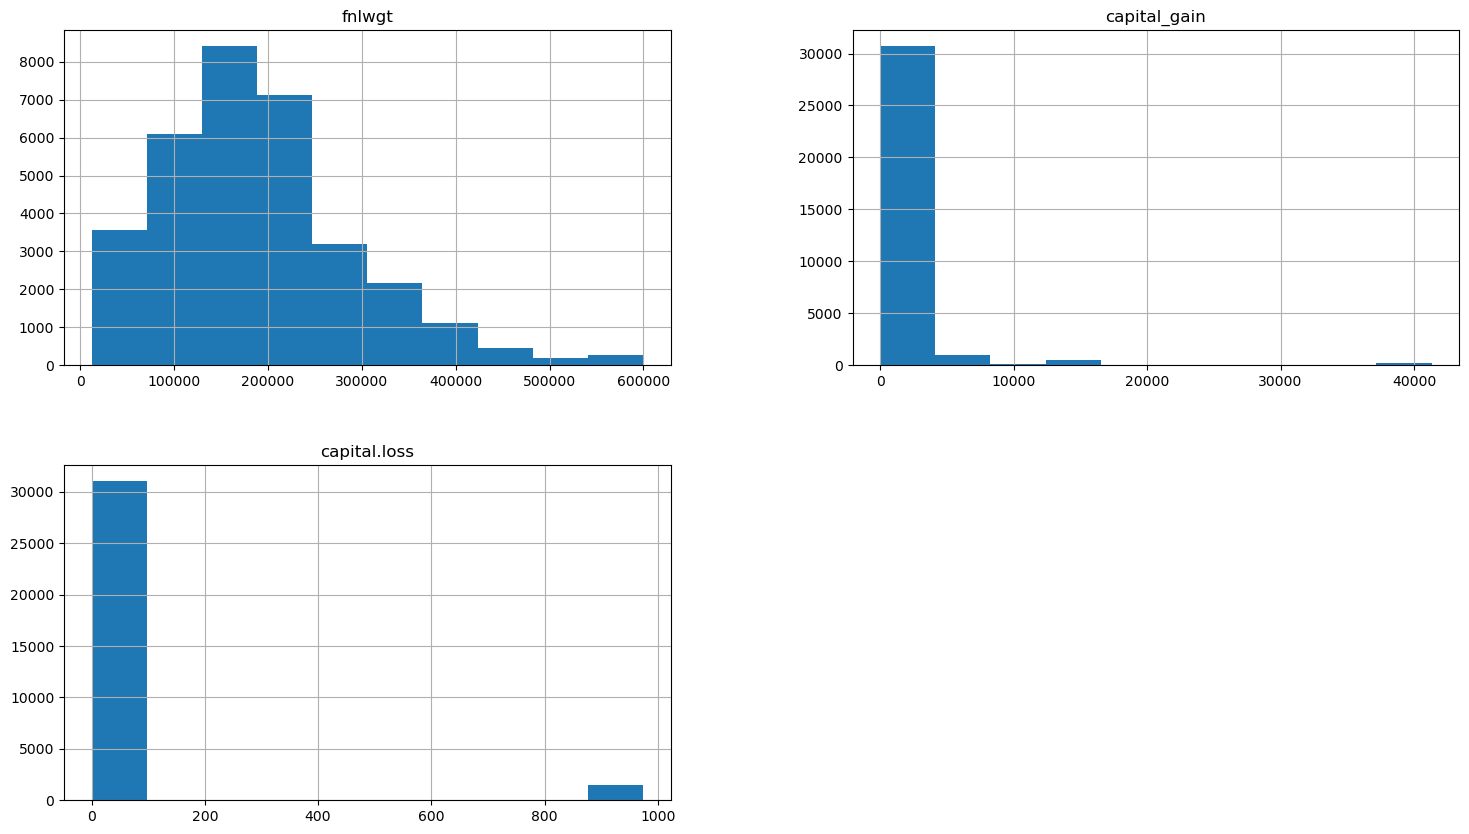

In [22]:
SalaryData.hist(['fnlwgt', 'capital_gain', 'capital.loss'], figsize=(18,10))
plt.show()

# Missing values treatment
Missing values are treated for each column separetely
If a column has more than 30% data missing, then missing values treatment cannot be done. That column must be rejected because too much information is missing

There are options for treating missing values in data.

* Delete the missing value rows if there are only few records.
* Impute the missing values with MEDIAN value for continuous variables.
* Impute the missing values with MODE value for categorical variables.
* Interpolate the values based on nearby values.
* Interpolate the values based on business logic.

So let's find how many missing values there are.

In [23]:
SalaryData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital.loss      0
hours_per_week    0
native_country    0
SalaryGT50K       0
dtype: int64

## Feature selection
Now its time to finally choose the best columns (features) which are correlated to the Target Variable.  
To do that we can directly measure the correlation values or ANOVA/CHI-SQUARE test.  
But first, and also is very helpful, to visualize the relation between the Target variable and each of the predictors to get a better sense of data. 

Techniques for visualizing the relationship between two variables as well as measuring the strength statistically.

> **Visual exploration of relationship between variables**  
    * Continuous Vs Continuous $\rightarrow$ Scatter plot  
    * Categorical Vs Continuous $\rightarrow$ Box plot  
    * Categorical Vs Categorical $\rightarrow$ Grouped bar plots 

> **Statistical measurement of relationship strenght between variables**  
    * Continuous Vs Continuous $\rightarrow$ Correlation matrix  
    * Categorical Vs Continuous $\rightarrow$ ANOVA test  
    * Categorical Vs Categorical $\rightarrow$ Chi-Square test

> For our case study the **Target variable is categorical**, hence below two scenarios will be present.  
    * Categorical Target Variable Vs Continuous Predictor  
    * Categorical Target Variable Vs Categorical Predictor


> ### Relationship exploration: CATEGORICAL  Vs  CONTINUOUS

* Categorical Vs Continuous $\rightarrow$ Box Plot  $\rightarrow$  Analize the relation visually
* Categorical Vs Continuous $\rightarrow$ ANOVA test  $\rightarrow$ Measure the strenght  statistically


<u>**Box plot**


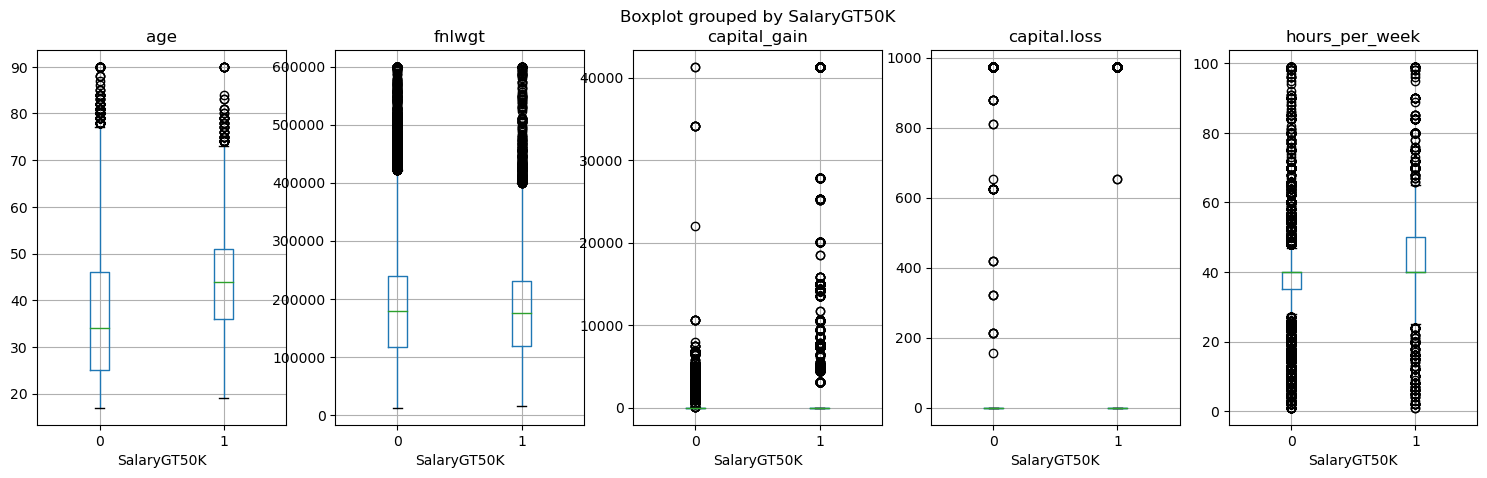

In [24]:
#First: Box plots for Categorical Target Variable "SalaryGT50K" and continuous predictors.
ContinuousColsList = ['age', 'fnlwgt', 'capital_gain', 'capital.loss', 'hours_per_week']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

#Second: Creating the plots for each continuous predictor against the Target Variable. 
for PredictorCol, i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    SalaryData.boxplot(column=PredictorCol, by='SalaryGT50K', figsize=(5,5), vert=True, ax=PlotCanvas [i])

**INTERPRETATION**  
What should we look for in these box plots?

Continuous predictor in the Y-axis for each of the category in the X-axis.
If the distribution looks similar for each category (boxes in the same line), that means the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

> - Boxes in the same line (horizontally): The target variable have NO dependency on the corresponding independent variable. For example in the case of 'fnlwgt' VS 'SalaryGT50K', the boxes are in the same line, it means that people who have income greater than 50k have no dependency on the final weight (fnlwgt) given to the population in their area.  
So, we can notice that we cannot distinguish between approval or rejection based on the 'fnlwgt', so this column in NOT CORRLATED with the TARGET VARIABLE 'SalaryGT50K'.


> - Boxes in different location (horizontally): The target variable have dependency on the corresponding independent variable.  
The other three charts exhibit opposite characteristics. Means the data distribution is defferent, BOXES ARE NOT IN THE SAME LINE, for each category of salary. It hints that these variables MIGHT BE CORRELATED with the TARGET VARIABLE 'SalaryGT50K'. 

**LET'S CONFIRM BY LOOKING AT THE RESULTS OF ANOVA TEST BELOW**

<u>**ANOVA test**
First of all: The Statistical test of Analysis Of Variance or ANOVA is used to determine if there are any statistically significance difference between the means of three or more independent groups.


Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable 
* Assumption (H0): There is NO relation between the given variables (i.e The average (mean) values of the numeric Predictor variable is same for all the groups in the catgorical Target variable, there is NO significance difference in the means of the groups)
* Alternative (H1): At least one group mean is different from the others.
* ANOVA Test result: Probability of H0 being true. 

In [25]:
# Defining a function to find the statistical relatinship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    
    #Creating an empty list of final selected
    SelectedPredictors=[]
    
    print('##### ANOVA Resultss ##### \n')
    for predictor in ContinuousPredictorList: 
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        #if Anova p-value is <0.05 (significance level), that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '|P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            
    return(SelectedPredictors)
        
        

In [26]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVairables=['age', 'fnlwgt', 'capital_gain', 'capital.loss', 'hours_per_week']
FunctionAnova(inpData=SalaryData, TargetVariable='SalaryGT50K', ContinuousPredictorList=ContinuousVairables)

##### ANOVA Resultss ##### 

age is correlated with SalaryGT50K |P-Value: 0.0
fnlwgt is NOT correlated with SalaryGT50K | P-Value: 0.10034099994119691
capital_gain is correlated with SalaryGT50K |P-Value: 0.0
capital.loss is correlated with SalaryGT50K |P-Value: 4.266838502495211e-143
hours_per_week is correlated with SalaryGT50K |P-Value: 0.0


['age', 'capital_gain', 'capital.loss', 'hours_per_week']

If the ANOVA result is $<$ than 0.5 IS CORRELATED, rejecting the H0.
If the ANOVA result is $>$ than 0.5 so IS NOT CORRELATED.
The results of ANOVA confirm our visual analysis using box plots above.

**Final selected Continuous columns:**
'age', 'capital_gain', 'capital.loss', 'hours_per_week'

### Relationship exploration: CATEGORICAL Vs CATEGORICAL

* Categorical Vs Categorical  → Grouped bar plots → Analize the relation visually
* Categorical Vs Categorical  → Chi-Square test → Measure the strenght  statistically

<u>**Grouped bar plots**

In [27]:
# Cross tabulation between two categorical variables
CrossTabResult=pd.crosstab(index=SalaryData['marital_status'], columns=SalaryData['SalaryGT50K'])
CrossTabResult

SalaryGT50K,0,1
marital_status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10176,491
Separated,959,66
Widowed,908,85


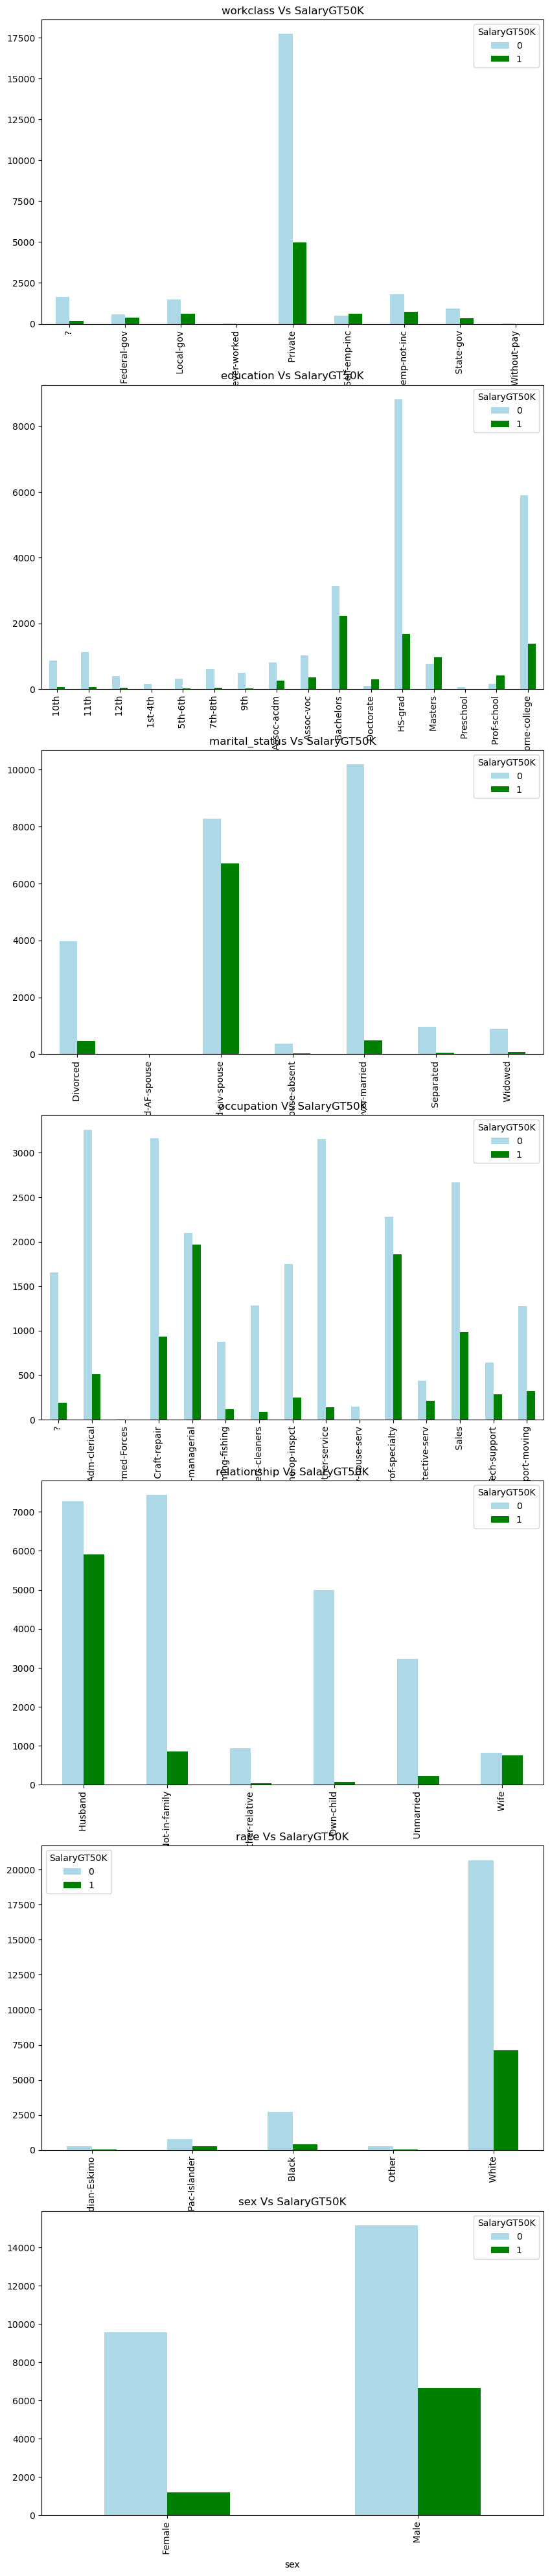

In [28]:
#Visual Inference using Grouped Bar Charts
#se quita native_country porque no cumple con las propiedades de distribucion para work
CategoricalColsLists=['workclass', 'education', 'marital_status', 'occupation',
                      'relationship', 'race', 'sex']

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsLists), ncols=1, figsize=(10,50))

#Creating Grouped bar plots for each categorical predictor against the Target Variable 'SalaryGT50K'
for CategoricalCol, i in zip(CategoricalColsLists, range(len(CategoricalColsLists))):
    CrossTabResult=pd.crosstab(index=SalaryData[CategoricalCol], columns=SalaryData['SalaryGT50K'])
    CrossTabResult.plot.bar(color=['lightblue', 'green'], ax=PlotCanvas[i], title=CategoricalCol+ ' Vs ' + 'SalaryGT50K')

**INTERPRETATION**
What to look for in these grouped bar charts?

> Without correlation: If the ratio of **bars are similar** across all categories, then the two columns are **NOT CORRELATED**.  

> With Correlation: If the ratio of **bars are not similar** across all categories, then the two columns are **CORRELATED**.

For example looking at the marital_status vs SalaryGT50k plot. The bars are different for each category, hence, two columns are correlated with each other.

Let's confirm this analysis in below section by using Chi-Square Tests.

<u> **Chi-Squared Test**

To check the correlation between two categorical variables.
* Assumption(H0): The two columns are NOT related to each other. There is no association or dependence between the variables.
* Result of Chi-Sq Test: The probability of H0 being true
* If the p-value is less than the chosen significance (0.05), the H0 is rejected suggesting a significance level association between the variables. 

In [29]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    SelectedPredictors=[] #creating an empty list of finalselected predictors
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [30]:
CategoricalVariables=['workclass', 'education', 'marital_status', 'occupation',
                     'relationship', 'race', 'sex']
FunctionChisq(inpData=SalaryData,
             TargetVariable='SalaryGT50K',
             CategoricalVariablesList= CategoricalVariables)

workclass is correlated with SalaryGT50K | P-Value: 3.352256069028484e-220
education is correlated with SalaryGT50K | P-Value: 0.0
marital_status is correlated with SalaryGT50K | P-Value: 0.0
occupation is correlated with SalaryGT50K | P-Value: 0.0
relationship is correlated with SalaryGT50K | P-Value: 0.0
race is correlated with SalaryGT50K | P-Value: 2.2797874171824478e-70
sex is correlated with SalaryGT50K | P-Value: 0.0


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

- If the ChiSq P-Value is <0.05, that means we reject H0, so the PREDICTOR or independent variable IS CORRELATED with the TARGET VARIABLE.
- If not, so accept HO and the PREDICTOR is not correlated with the target variable.

**Finally selected Categorical variables:**  
'workclass', 
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex'; 

# Visual  correlation analysis
We already did.
# Statistical correlation analysis *(Feature selection)* 
Thanks to the previous steps we have the selected variables.

##### ANOVA Resultss ##### 

- age is correlated with SalaryGT50K |P-Value: 0.0
- fnlwgt is NOT correlated with SalaryGT50K | P-Value: 0.10034099994119691
- capital_gain is correlated with SalaryGT50K |P-Value: 0.0
- capital.loss is correlated with SalaryGT50K |P-Value: 4.266838502495211e-143
- hours_per_week is correlated with SalaryGT50K |P-Value: 0.0

Finally selected continuous variables: ['age', 'capital_gain', 'capital.loss', 'hours_per_week']

###### CHI-SQUARED TEST ####

- workclass is correlated with SalaryGT50K | P-Value: 3.352256069028484e-220
- education is correlated with SalaryGT50K | P-Value: 0.0
- marital_status is correlated with SalaryGT50K | P-Value: 0.0
- occupation is correlated with SalaryGT50K | P-Value: 0.0
- relationship is correlated with SalaryGT50K | P-Value: 0.0
- race is correlated with SalaryGT50K | P-Value: 2.2797874171824478e-70
- sex is correlated with SalaryGT50K | P-Value: 0.0

Finally selected categorical variables: ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']


### Creating a new group with the sampling variables  

Sampling is the process of selecting a subset of data to perform analyses or build models. This subset "SelectedColumns" we are going to use for creating training and testing datasets.


Let's create a new group taking the selected variables which are going to be the predictors for the ML.

Instead of original "education" column, let's select "education_num" column, which is the ordinal property of the data.

In [31]:
SelectedColumns = ['workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'age', 'capital_gain', 'capital.loss', 'hours_per_week']


In [32]:
DataForML = SalaryData[SelectedColumns]
DataForML.head()

,workclass,education_num,marital_status,occupation,relationship,race,sex,age,capital_gain,capital.loss,hours_per_week
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,39,2174,0,40
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,0,0,13
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,0,0,40
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,0,0,40
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,0,0,40


In [33]:
#Let's save the final data for reference during deployment.
DataForML.to_pickle('DataForML.pkl')

# Converting data to numeric for ML

With machine Learning algorithms we cannot work with categorical or non-numeric data, instead we need numeric data to perform mathematical operations. 
Keep in mind:
> - Nominal: Categorical variables with categories that have no inherent order, ranking or hierarchy.
> - Ordinal: Categorical variables, but the categories have an order or ranking and it is significant, however the intervals between them may not be uniform or measurable. For example an ordinal column "Size" with categories"small", "medium", "large", so we can map these categories to numeric values.

For now on we will follow the next steps performed on predictor variables before data can be used for the machine learning model.  
1. Converting each **Ordinal Categorical** columns. It preserves the ordinal relationship between categories. 
2. Converting **Binary Nominal Categorical** columns using 1/0 mapping. Having only two categories in a column.
3. Converting **all other Nominal Categorical** columns using pd.get_dummies() method. Creates binary columns for each category. Is important for algorithms that treat each category independently.
4. Data Transformation (Optional) Standarization/Normalization/log/sqrt. Are crucial for algorithms sensitive to the scale features, such as distance-based, like KNN or gradient-based optimization, such as Neural Networks. 
> - Standarization: Implies substracting the mean and dividing by the standard deviation. 
> - Normalization: Implies scalling to a specified range 



In [34]:
import warnings 
warnings.filterwarnings('ignore')

This code below help us to understand and to identify which columns corresponds to each case to be treated.

In [35]:
#SalaryData.nunique()
#for n in DataForML.columns:
#    unique_values = DataForML[n].unique()
#    print(f"Column:{n}, Unique Values:{unique_values}")

## Converting the binary nominal variable to numeric using 1/0 mapping

In [36]:
DataForML['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [37]:
#Notice the space in the declaration of the names [' Male', ' Female'].
DataForML['sex'].replace({' Female':0, ' Male':1}, inplace=True)

In [38]:
DataForML.head()

,workclass,education_num,marital_status,occupation,relationship,race,sex,age,capital_gain,capital.loss,hours_per_week
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,39,2174,0,40
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,50,0,0,13
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,38,0,0,40
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,53,0,0,40
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,28,0,0,40


## Converting the nominal variable to numeric using get_dummies()

In [39]:
#Treating all the nominal variables at once using dummy variables.
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric

,education_num,sex,age,capital_gain,capital.loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,13,1,39,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,13,1,50,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,1,38,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,7,1,53,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,0,28,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,27,0,0,38,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,9,1,40,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,9,0,58,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,9,1,22,0,0,20,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
#Adding Target variable to the data DataForML_Numeric from the original dataset.
DataForML_Numeric['SalaryGT50K']=SalaryData['SalaryGT50K']

In [41]:
DataForML_Numeric.head()

,education_num,sex,age,capital_gain,capital.loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,SalaryGT50K
0,13,1,39,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,1,50,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,38,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,1,53,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,13,0,28,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# K-fold cross validation

Splitting the data into Training and Testing sample.
Let's be clear, we do not use the entire data for creating the model. 
> - **Testing data:** Some data is randomly selected and kept aside for checking how good the model is. Typically 30% of the data is used here.  
> - **Training data:** The remaining data. On which the model is built. Typically 70% of the data is used here.


In [42]:
DataForML_Numeric.columns #for reference

Index(['education_num', 'sex', 'age', 'capital_gain', 'capital.loss',
       'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       '

Let's separate the Target Variable and Predictor Variables 

In [43]:
TargetVariable = 'SalaryGT50K'

In [44]:
Predictors = ['education_num', 'sex', 'age', 'capital_gain', 'capital.loss',
       'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White']

In [45]:
x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [46]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
# test_size=0.3 for testing and the remaining 0.7 to training
# random_state=428, we will get the same random splitting of the data each time we run the code.
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=428)

## Standarization/Normalization of the data


> 1. **Standarization**: Or z-score normalization, transforms the features to have a mean of 0 and a std of 1. The effect is that this centers the data around zero and scales it in terms of standart deviations.  
$z = \frac{x-mean}{std}$
> 2. **Normalization**: Scales the features to a specified range, often $[0,1]$. The effect the transformation of the data to a comparable range, making it suitable to the scale of features as some algorithms are sensitive to this.  
$x_{normalized} = \frac{x-min}{max-min}$

This preprocessing step is often benefitial for algorithms that are sensitive to the scale of features. This process help to some algorithms to converge faster and improve overall performance.  
SO for this case:  
> - Standarization/Normalization is generally recommended for Logistic Regression, AdaBoost, XGBoost, SVM, and KNN algorithms.

> - Standarization/Normalization is NOT necessary for Decision Trees, Random Forest, Naive Bayes.


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- Min Max normalization produced better results, for this data.
- Choose between standarization and MinMax normalization


<u>**For the cases where it is not necessary**

In [48]:
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test


<u>**For the cases where it is necessary**

In [49]:
min_max_scaler = MinMaxScaler()

X_train_normalized=min_max_scaler.fit_transform(X_train)
X_test_normalized=min_max_scaler.transform(X_test)
y_train
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print(X_train_normalized.shape)
print(y_train.shape)
print(X_test_normalized.shape)
print(y_test.shape)

(22775, 48)
(22775,)
(9762, 48)
(9762,)


In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22775, 48)
(22775,)
(9762, 48)
(9762,)


# Trying multiple classification algorithms 
## Logistic Regression

We will use the class LogisticRegression in scikit-learn that implements logistic regression, which is a binary classification algorithm.
- C=1, the C parameter is the inverse of regularization strenght. Smaller values of C result in stronger regularization. Regularization helps prevent overfitting by penalizing large coefficients. In this case equal to 1 suggests moderate regularization.
- penalty=l2, specifies the type of regularization where l2 refers to L2 regularization, which adds a penalty term to the cost function based on the squared magnitude of the coefficients. L1 adds the sum of the absolute values of the coefficients as a penalty term to the cost function.
- solver=newton-cg, stands for Newton-conjugate Gradient. Different solvers use different optimization algorithms, and the choise of solver can affect the convergence and performace of the logistic regression model.

In [52]:
from sklearn.linear_model import LogisticRegression

#choose parameter Penalty='l1' or C=1
#choose different values for solver 'newton-cg', 'lbfgs', 'sag', 'saga'
clf = LogisticRegression(C=1, penalty='l2',solver='newton-cg')
#printing all the parameters of logistic regression
print(clf)

LogisticRegression(C=1, solver='newton-cg')


In [53]:
#Let's create the model on Training Data
LOG=clf.fit(X_train_normalized, y_train)
prediction=LOG.predict(X_test_normalized)

In [54]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7415
           1       0.74      0.60      0.66      2347

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.78      9762
weighted avg       0.85      0.85      0.85      9762

[[6908  507]
 [ 936 1411]]


In [55]:
# Printing the overall accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.85


In [56]:
#importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

#Running 10-Fold cross validation on a given algorithm 
#passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_values = cross_val_score(LOG, x, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:n\n', Accuracy_values)


Accuracy values for 10-fold Cross Validation:n
 [0.84327096 0.84194248 0.84911552 0.83529324 0.85132729 0.84677774
 0.84642998 0.85310221 0.84783091 0.84411956]


In [57]:
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))


Final Average Accuracy of the model: 0.85


**Interpretation**

## Decision Trees

In [58]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [59]:
#Let's create the model on training Data
Dtree=clf.fit(X_train, y_train)
prediction = Dtree.predict(X_test)

In [60]:
#Let's measure the accuracy of the Testing Data
#from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7415
           1       0.77      0.51      0.61      2347

    accuracy                           0.85      9762
   macro avg       0.81      0.73      0.76      9762
weighted avg       0.84      0.85      0.83      9762

[[7059  356]
 [1154 1193]]


In [61]:
#the overall accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.83


<Axes: >

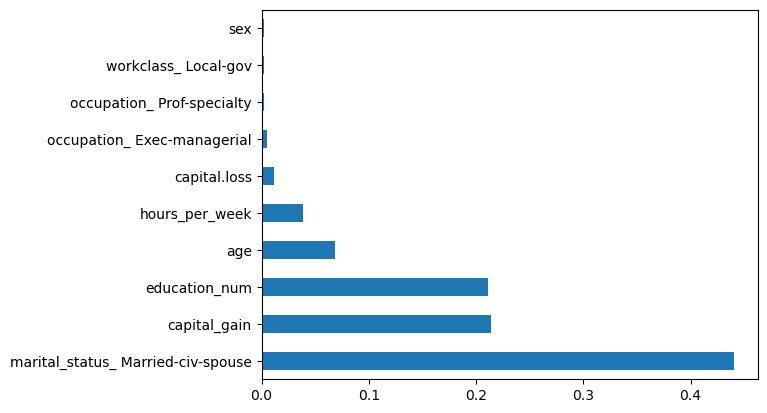

In [62]:
#Plotting the feature importance for Top 10 most important columns.
feature_importance = pd.Series(Dtree.feature_importances_, index=Predictors)
feature_importance.nlargest(10).plot(kind='barh')

In [63]:
#Importing cross validation function from sklearn 

#from sklearn.model_selection import cross_val_score, we already import this, but is important to know the step

#To runn 10-Fold Cross Validation on a given algorithm 
#Passing the entire X and Y data because the K-fold will split the data and automatically choose train/test.

Accuracy_Values = cross_val_score(Dtree, x, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)



Accuracy values for 10-fold Cross Validation:
 [0.82584983 0.8314983  0.84011881 0.82103951 0.83438495 0.83595917
 0.83429923 0.84327588 0.84346451 0.82980782]


In [64]:
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Final Average Accuracy of the model: 0.83


> ### Plotting the Decision Tree

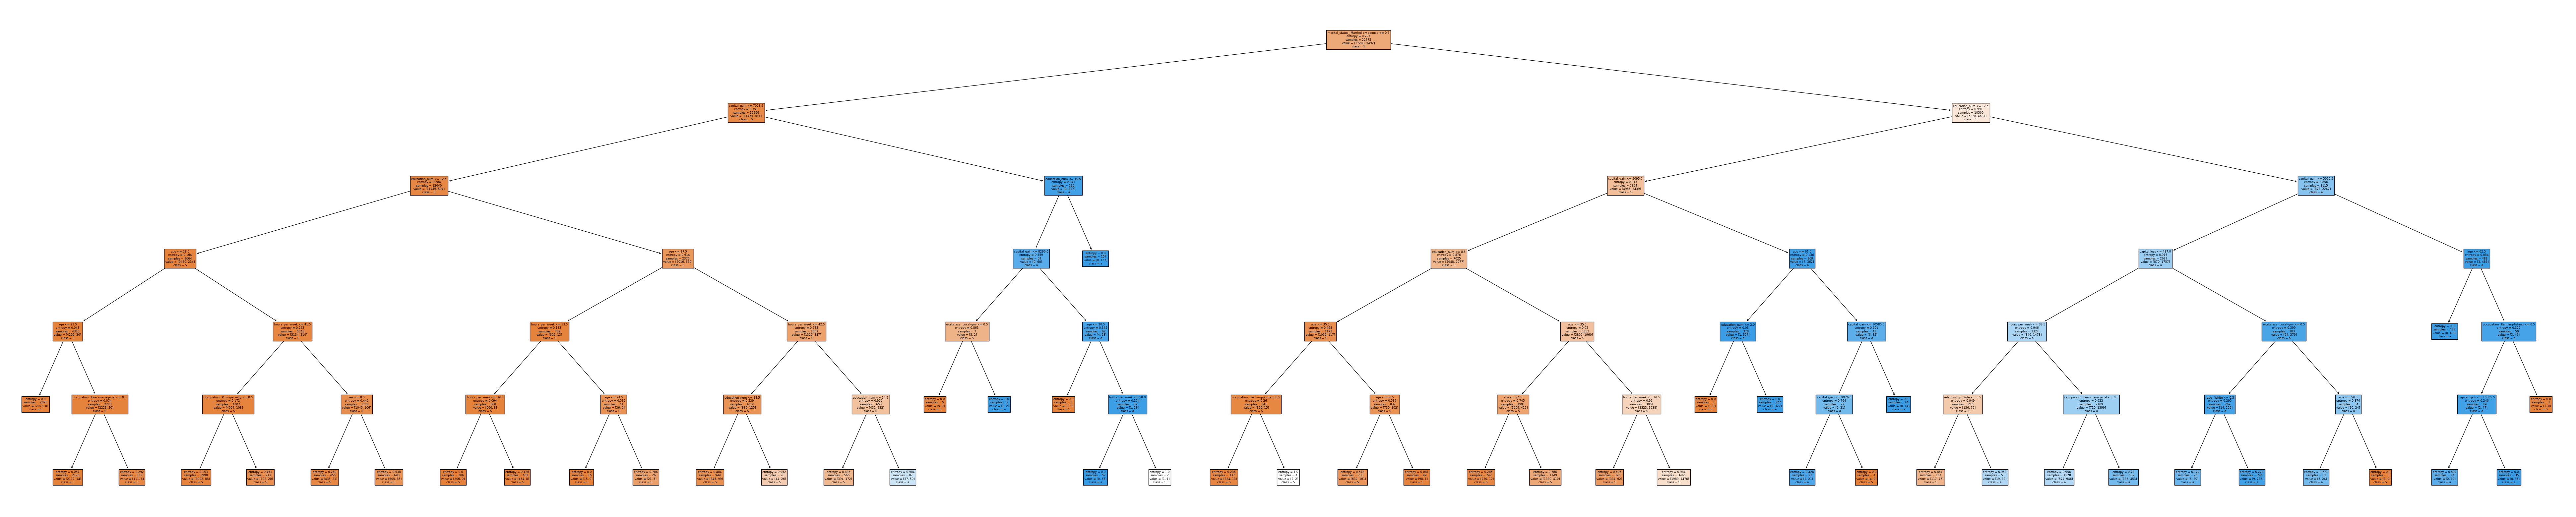

In [65]:
from sklearn.tree import plot_tree
%matplotlib inline

fig = plt.figure(figsize=(100,20))
ax = fig.add_subplot()
plot_tree(clf, feature_names=Predictors, ax=ax, class_names=TargetVariable, filled=True);

**Interpretation**

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=100, criterion='gini')
print(clf)

RandomForestClassifier(max_depth=5)


Let's create the model on training Data

In [67]:
RF = clf.fit(X_train, y_train)
prediction = RF.predict(X_test)

Measuring accuracy on Training Data

In [68]:
#from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7415
           1       0.82      0.44      0.57      2347

    accuracy                           0.84      9762
   macro avg       0.83      0.70      0.74      9762
weighted avg       0.84      0.84      0.82      9762

[[7182  233]
 [1320 1027]]


The overall accuracy of the model

In [69]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Acuracy of the model on Testing Sample data:', round(F1_Score,2))

Acuracy of the model on Testing Sample data: 0.82


Importing cross validation function from sklearn

In [70]:
#from sklearn.model_selection import cross_val_score, but we already do this since the logaritmic step

#Running 10-Fold Cross validation on a given algorithm 
#To pass full data X and y because the k-fold will split the data and automatically choose train/test 
Accuracy_Values = cross_val_score(RF, x, y, cv=10, scoring= 'f1_weighted')
print('\n Accuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\n Final Average Accuracy of the model: ', round(Accuracy_Values.mean(),2))


 Accuracy values for 10-fold Cross Validation:
 [0.82102884 0.81201723 0.83290423 0.82457911 0.83178387 0.82524723
 0.81749638 0.83049127 0.83378905 0.81911849]

 Final Average Accuracy of the model:  0.82


Plotting the feature importance: Top 10 most important columns

<Axes: >

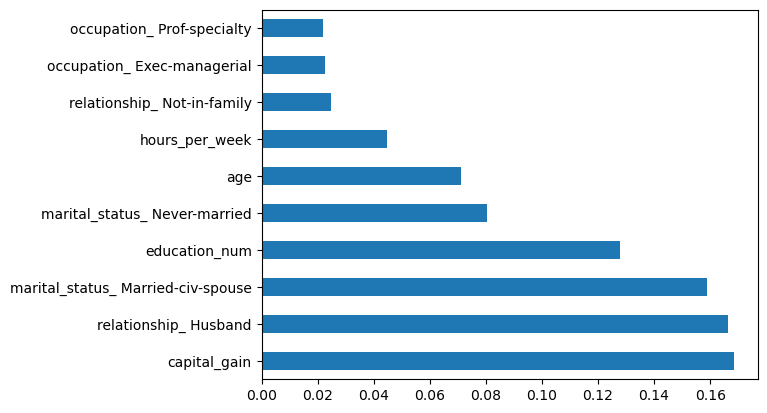

In [71]:
%matplotlib inline 

feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

> ### Plotting a single Decision Tree from Random Forest

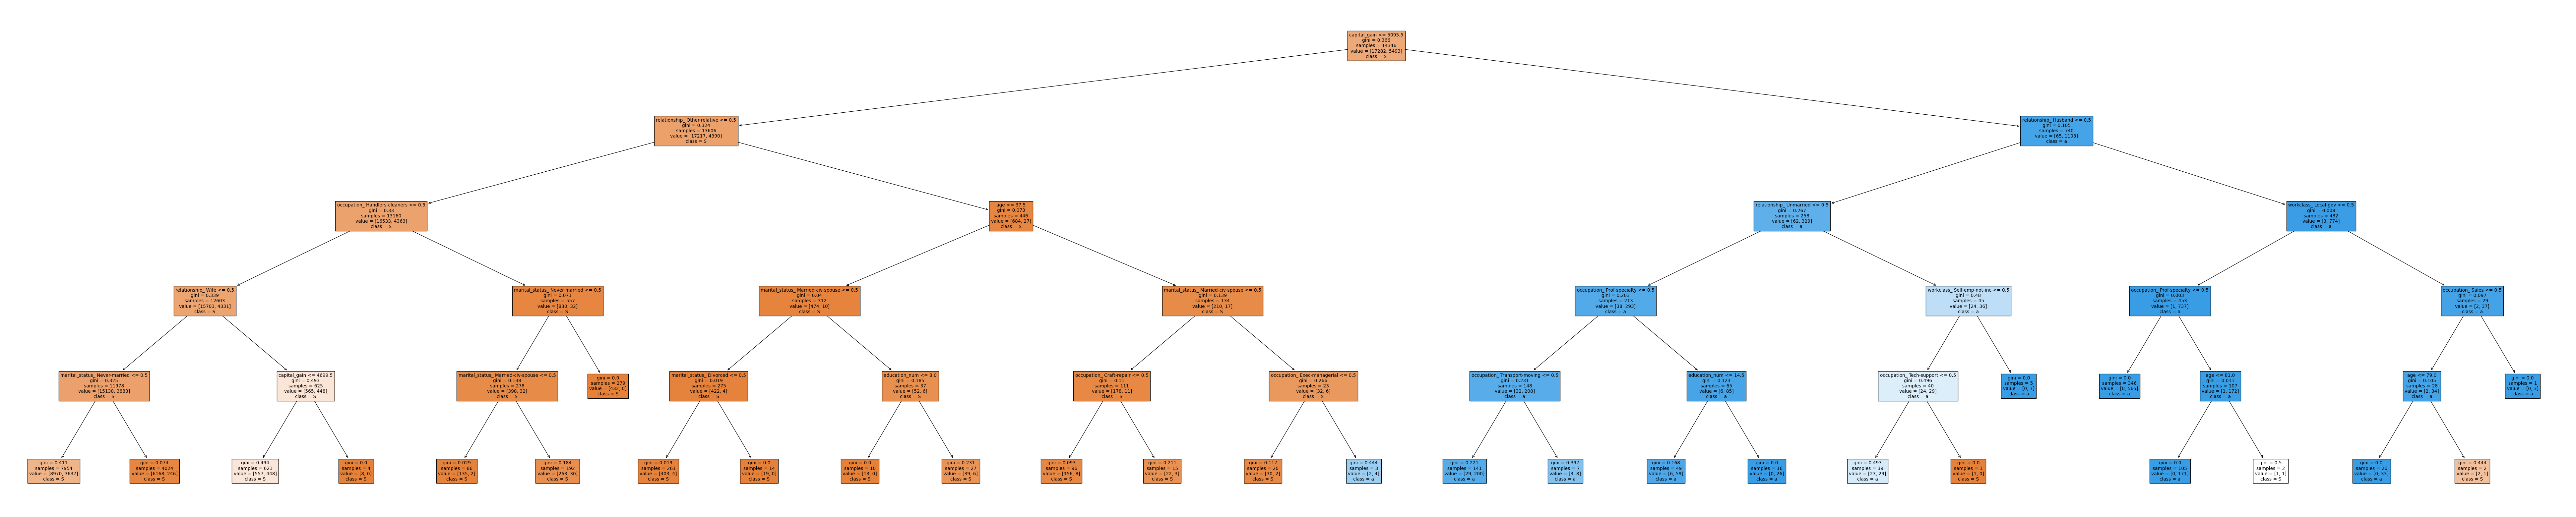

In [72]:
%matplotlib inline
fig = plt.figure(figsize=(100,20))
ax = fig.add_subplot()
plot_tree(clf.estimators_[4], feature_names=Predictors, ax=ax, class_names=TargetVariable, filled=True);
#clf is the model bore fit, is the sme case for all the cases until now.


## AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier #we already caol this in the previous code

Choosing Decision Tree with 1 level as the weak learnes

In [74]:
DTC = tree.DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC, learning_rate=0.1)
print(DTC)

DecisionTreeClassifier(max_depth=1)


In [75]:
print(clf)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100)


Creating the model in Training Data

In [76]:
AB = clf.fit(X_train_normalized, y_train)
prediction = AB.predict(X_test_normalized)

Measuring accuracy on Testing Data

In [77]:
#from sklearn import metrics #we already did, on the logaritmic process
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7415
           1       0.80      0.52      0.63      2347

    accuracy                           0.85      9762
   macro avg       0.83      0.74      0.77      9762
weighted avg       0.85      0.85      0.84      9762

[[7108  307]
 [1137 1210]]


Let's see the overall accuracy of the model

In [78]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.84


Cross validation function from sklearn

In [79]:
#from sklearn.model_selection import cross_val_score
#The same as before
#Running 10-Fold Cross Validation on a given algorithm 
#Passing full data X and y because the K-fod will split the data automatically choose train/test
Accuracy_Values = cross_val_score(AB, x, y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold:\n', Accuracy_Values)
print('\Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


 Accuracy values for 10-fold:
 [0.83153652 0.83642676 0.84323762 0.82877025 0.84057499 0.84124016
 0.83540702 0.84669152 0.84545437 0.83822076]
\Final Average Accuracy of the model: 0.84


Plotting the feature importance for top 10 mosts important columns.

<Axes: >

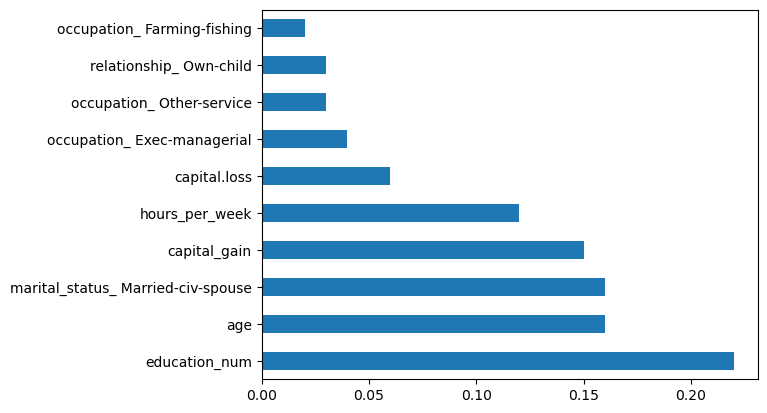

In [80]:
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

> ### Plotting a single Decision Tree from Adaboost

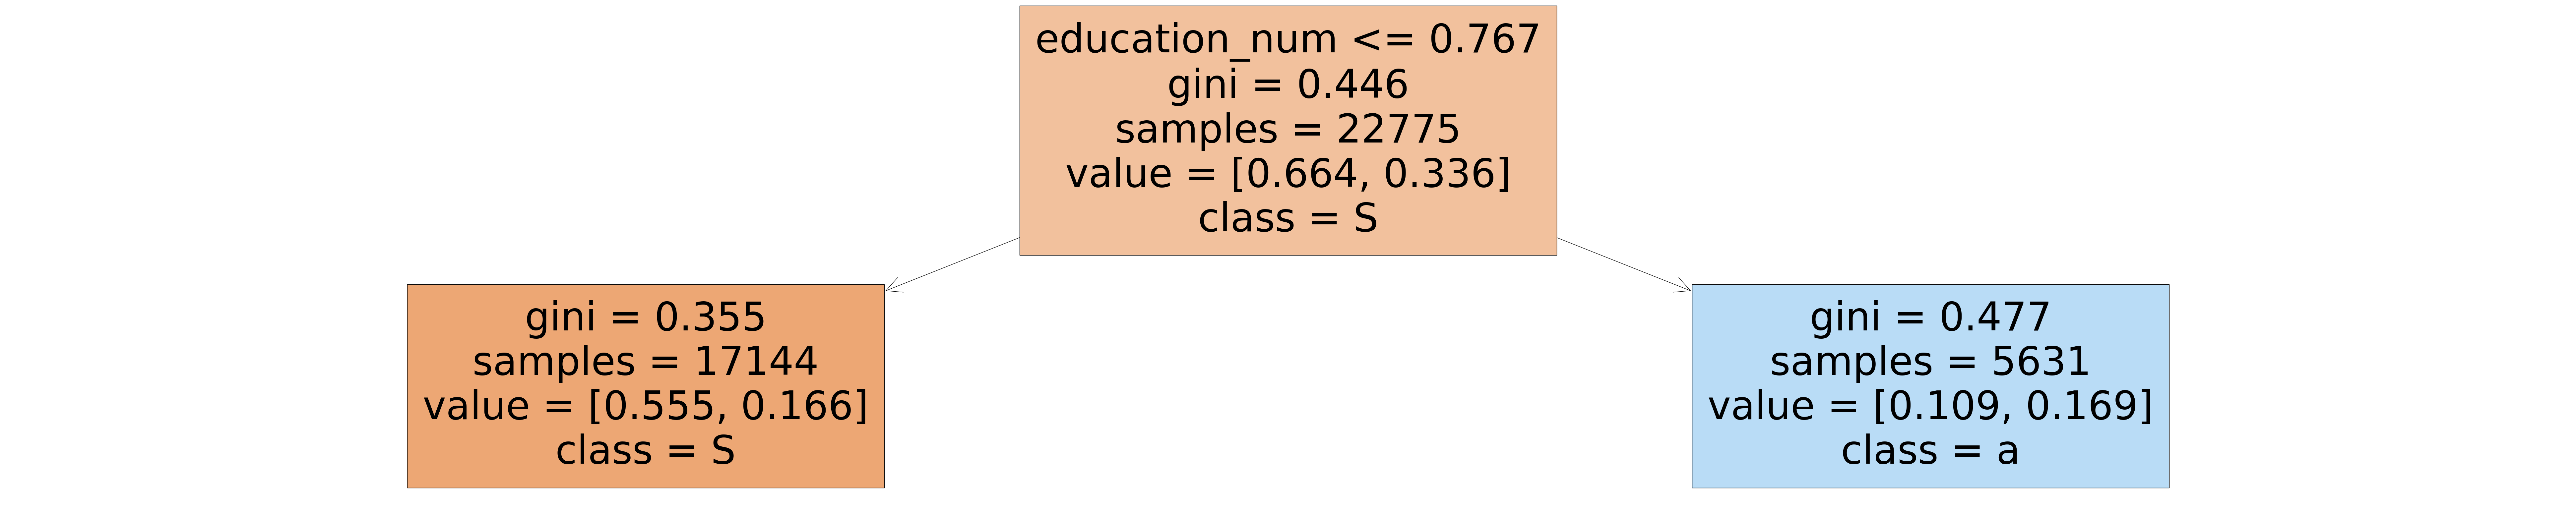

In [81]:
%matplotlib inline
fig = plt.figure(figsize=(100,20))
ax = fig.add_subplot()
plot_tree(clf.estimators_[5], feature_names=Predictors, ax=ax, class_names=TargetVariable, filled=True);

## XGBoost

In [82]:
# Xtreme Gradient Boosting 
from xgboost import XGBClassifier

Chossing the Decision Tree with 1 level as the weak learner

In [83]:
clf=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')
print(clf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Creating the model on Training Data

In [84]:
XGB=clf.fit(X_train_normalized, y_train)
prediction=XGB.predict(X_test_normalized)

Let's measure the accuracy on Testing Data

In [85]:
#for this we need 
#from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7415
           1       0.78      0.59      0.67      2347

    accuracy                           0.86      9762
   macro avg       0.83      0.77      0.79      9762
weighted avg       0.86      0.86      0.85      9762

[[7023  392]
 [ 958 1389]]


Let's see the overall accuracy of the model

In [86]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.85


Cross validation function form sklearn

In [87]:
#from sklearn.model_selection import cross_val_score
#Same as before
#Passing full data X and y because the K-fold will split the data automatically choose train/test
Accuracy_Values = cross_val_score(XGB, x, y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


 Accuracy values for 10-fold:
 [0.84917056 0.85197294 0.85474826 0.84827773 0.85596388 0.8563503
 0.85058864 0.86012066 0.85865284 0.85528328]

Final Average Accuracy of the model: 0.85


Plotting the top 10 most important clumns, feature importance.

<Axes: >

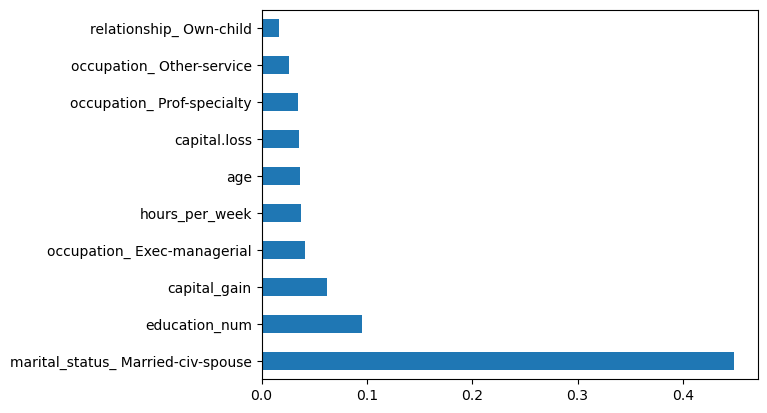

In [88]:
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

> ### Plotting a single Decision Tree out of XGBoost 

<Axes: >

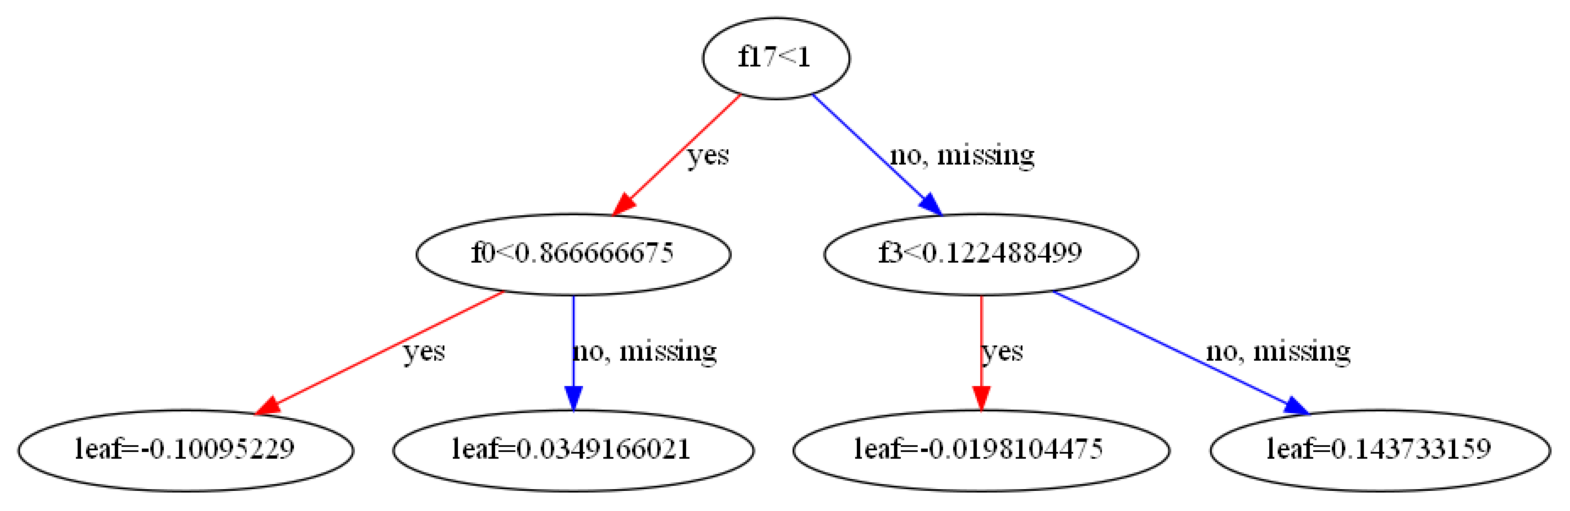

In [89]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(20,8))
plot_tree(XGB, num_trees=10, ax=ax)


## KNN _ K-Nearest Neighbor 

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
clf = KNeighborsClassifier(n_neighbors=3)
print(clf)

KNeighborsClassifier(n_neighbors=3)


Let's create the model on Training Data

In [92]:
KNN = clf.fit(X_train_normalized, y_train)
prediction=KNN.predict(X_test_normalized)

Measure the accuracy on Testing Data

In [93]:
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7415
           1       0.65      0.58      0.61      2347

    accuracy                           0.82      9762
   macro avg       0.76      0.74      0.75      9762
weighted avg       0.82      0.82      0.82      9762

[[6679  736]
 [ 995 1352]]


Let's print the overall accuracy of the model

In [94]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.82


Cross validation function from sklearn

In [95]:
#from sklearn.model_selection import cross_val_score
#As before
#Running 10-Fold Cross Validation on a given algorithm
#Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(KNN, x, y, cv=10,  scoring='f1_weighted')
print('\n Accuracy values for 10-fold cross validation:\n', Accuracy_Values)
print('Final average accuracy of the model', round(Accuracy_Values.mean(),2))


 Accuracy values for 10-fold cross validation:
 [0.82201206 0.82195574 0.83549126 0.83751041 0.83650891 0.83169522
 0.82766921 0.83051696 0.84001304 0.83286957]
Final average accuracy of the model 0.83


There is no built-in method to get feature importance for the Top 10 in KNN.

## SVM_Support Vector Machines

In [96]:
from sklearn import svm

In [97]:
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)
print(clf)

SVC(C=3, gamma=0.1)


Creating the model on Training Data

In [98]:
SVM = clf.fit(X_train_normalized, y_train)
prediction = SVM.predict(X_test_normalized)

Measuring the accuracy on Testing Data

In [99]:
#from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7415
           1       0.75      0.59      0.66      2347

    accuracy                           0.85      9762
   macro avg       0.81      0.76      0.78      9762
weighted avg       0.85      0.85      0.85      9762

[[6944  471]
 [ 958 1389]]


Let's print the overall accuracy of the model

In [100]:
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

Accuracy of the model on Testing Sample Data: 0.85


Cross validation function for sklearn

In [101]:
#from sklearn.model_selection import cross_val_score
#As before
#Running 10-Fold Cross validation on a given algorithm
#Passing the entire data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(SVM, x, y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KeyboardInterrupt: 

The built-in attribute SVM.coef_ works only for linear kernel. Making reference to the plotting of the Top 10 most important columns or feature importance part.

In [ ]:
#%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

## Naive Bayes 
GaussianNB is used in Binomial Classification  
MultinomialNB is used in multi-class classification

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
clf = GaussianNB()
#clf = MultinomialNB()
print(clf)

In [ ]:
NB=clf.fit(X_train, y_train)
prediction=NB.predict(X_test)

Measuring the accuracy on Testing Data

In [ ]:
#from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

Printing the overall Accuracy of the model.

In [ ]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Cross validation function from sklearn.

In [ ]:
#from sklearn.model_selection import cross_val_score
#Same as before
#Running full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, x, y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Selecting the best Model

After trying multiple classification algorithms, now is time to select the algorithm **with best average accuracy**.
We have 7 algorithms, here the results:
1. Logistic Regression 
> - Accuracy of the model on Testing Sample Data: 0.85
> - Final Average Accuracy of the model: 0.85

2. Decision Trees
> - Accuracy of the model on Testing Sample Data: 0.84
> - Final Average Accuracy of the model: 0.83

3. Random Forest
> - Acuracy of the model on Testing Sample data: 0.83
> - Final Average Accuracy of the model:  0.82
    
4. AdaBoost
> - Accuracy of the model on Testing Sample Data: 0.84
> - Final Average Accuracy of the model: 0.84   
    
5. XGBoost 
> - Accuracy of the model on Testing Sample Data: 0.86
> - Final Average Accuracy of the model: 0.85

6. KNN _ K-Nearest Neighbor
> - Accuracy of the model on Testing Sample Data: 0.82
> - Final average accuracy of the model 0.82

7. SVM_Support Vector Machines
> - Accuracy of the model on Testing Sample Data: 0.84
> - Final Average Accuracy of the model: 0.85
    
8. Naive Bayes  
> - Accuracy of the model on Testing Sample Data: 0.64
> - Final Average Accuracy of the model: 0.63
    

For this project let's use Logistic Regression as the final model since it is very fast for this data!  
We will follow the next steps to deploy the model:  

1. Choosing most important variables.
2. Train the model using 100% data available 
3. Save the model as a serialized file which can be stored anywhere.
4. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) To take all the inputs and returns the prediction.


<u>**1. Choosing most important variables**

Its important to keep in mind that lesser number of predictors is beneficial while deploying it in production. The lesser predictors the better, so the model will be less dependent hence, more stable.  
When the data has too many predictor columns, let's say high dimensional, this step is important.  

In the first evaluation we chose the next columns:  
> - SelectedColumns = *['age', 'education_num', 'hours_per_week', 'capital_gain',
'capital.loss', 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']*.   
> - After testing with different algorithms, in the previous step, we realised that the following variables are consistently on top of the variable importance chart, hence let's choose *[ 'age', 'education_num', 'hours_per_week', 'capital_gain', 'capital.loss', 'workclass', 'marital_status']* as final set of predictors variables.


In [ ]:
DataForML_Numeric.columns #as a reference

In [ ]:
TargetVariable = 'SalaryGT50K'
Predictors = ['education_num', 'age', 'capital_gain', 'capital.loss',
       'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed']

In [ ]:
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

PredictorScaler = MinMaxScaler()


In [ ]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)
print(X.shape)
print(y.shape)

<u>**2. Training the model using 100% data**

Cross validating the final model accuracy with less predictors

<u>**3. Save the model as a serialized file which can be stored anywhere**

<u>**4. Let's create a python function**


# Deploying the best model in production


## Function for predictions API

## Creating Flask API


16. 
17. 